# Author : Vaishnavi Parate
Data Science & Business Analytics Intern

# Task-2 : Prediction Using Supervised ML
From the given ‘Iris’ dataset, predicting the optimum number of clusters and representing it visually.


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

# Loading data



In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Checking for null values


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Pair plot to see dependencies



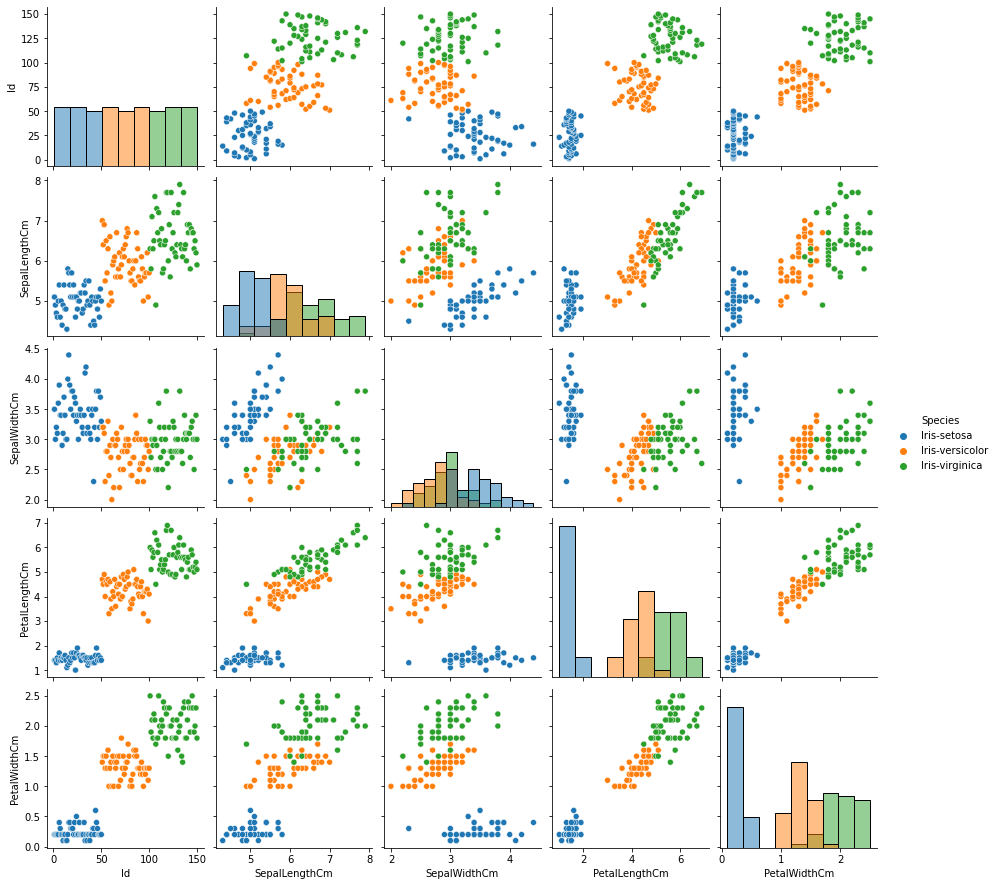

In [5]:
sns.pairplot(df,hue='Species', diag_kind="hist")

# Corelation



<AxesSubplot:>

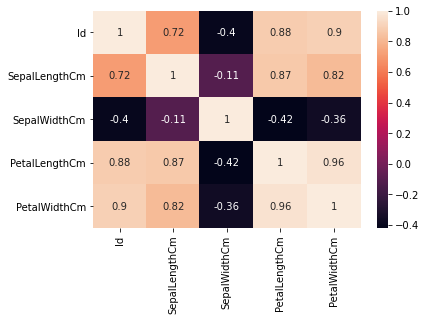

In [6]:
sns.heatmap(df.corr(), annot = True) 

# Define X



In [7]:
x = df.iloc[:, [0, 1, 2, 3]].values

# Cluster for classification


 

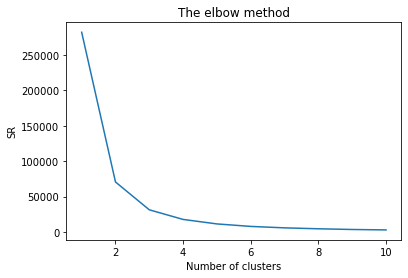

In [8]:
from sklearn.cluster import KMeans
sr = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sr.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# Allowing us to observe 'The elbow'
plt.plot(range(1, 11), sr)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SR') # Within cluster sum of squares
plt.show()
sns.set(rc={'figure.figsize':(5,5)})

# Applying kmeans to the dataset



In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

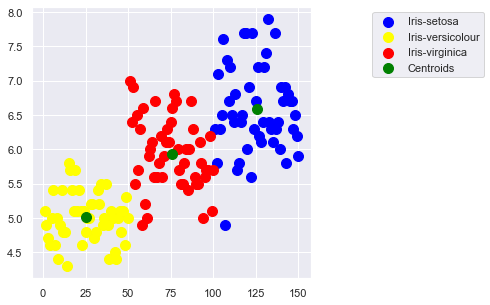

In [10]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend(bbox_to_anchor=(1.2, 1.0))
sns.set(rc={'figure.figsize':(10,5)})